# Convergence Speed Analysis 3

James Yu, 29 July 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A_1 = np.array([
    [0.999999, 0.00000075, 0.00000025],
    [0.00000075, 0.9924995, 0.00749975],
    [0.00000025, 0.00749975, 0.9925]
])

A_2 = np.array([
    [0.48, 0.3, 0.22],
    [0.3, 0.52, 0.18],
    [0.22, 0.18, 0.6]
])

In [3]:
eigvals_1, U_1 = np.linalg.eig(A_1)
eigvals_1

array([0.9999985, 1.       , 0.985    ])

In [4]:
eigvals_2, U_2 = np.linalg.eig(A_2)
eigvals_2

array([1.        , 0.19416995, 0.40583005])

In [5]:
delta = 0.9
c = 1.0
T = 60
x_0 = np.array([[5.0, 10.0, 2.0]], ndmin = 2).T
x_0

array([[ 5.],
       [10.],
       [ 2.]])

# Using the projected $x_t$ in the plots and data

In [6]:
def infinite_solution(A, delta, c, x_0):
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    while True: # generate solution matrices
        K_t_new = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t_new)
        if np.allclose(K_t, K_t_new, 
                       rtol = np.finfo(K_t.dtype).eps, 
                       atol = np.finfo(K_t.dtype).eps):
            break
        K_t = K_t_new
        
    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [U.T @ x_0]
    K_ss = K_sequence[0]
    while True:
        L_ss = -delta * (np.linalg.inv((delta * K_ss) + (c * I)) @ K_ss @ D)
        tilde_r_t = L_ss @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_t_new = tilde_x_t_new
        x_ts.append(x_t_new)
        r_t = U @ tilde_r_t
        r_ts.append(r_t)
        
        if np.allclose(tilde_x_t, tilde_x_t_new, 
                       rtol = np.finfo(tilde_x_t.dtype).eps, 
                       atol = np.finfo(tilde_x_t.dtype).eps):
            break
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts, K_ss

In [7]:
x_sequence_1i, r_sequence_1i, K_ss_1 = infinite_solution(A_1, delta, c, x_0)
x_sequence_2i, r_sequence_2i, K_ss_2 = infinite_solution(A_2, delta, c, x_0)

Agent 1 does not change between networks so removing it from the plots for visibility:

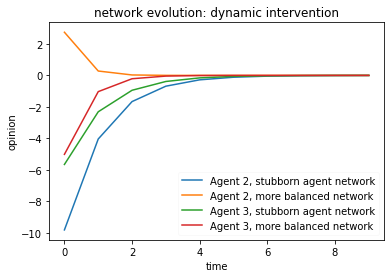

In [8]:
for i in range(1, 3):
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(10), [x_sequence_2i[j][i].item() for j in range(10)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "lower right")
plt.title("network evolution: dynamic intervention")
plt.show()

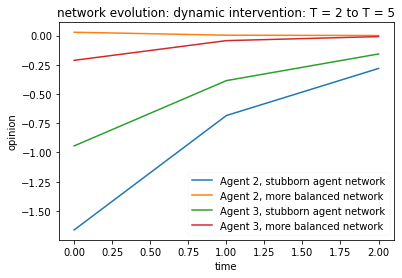

In [9]:
for i in range(1, 3):
    plt.plot(range(3), [x_sequence_1i[j][i].item() for j in range(2, 5)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(3), [x_sequence_2i[j][i].item() for j in range(2, 5)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "lower right")
plt.title("network evolution: dynamic intervention: T = 2 to T = 5")
plt.show()